In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
import os

In [2]:
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Load the dataset
data = pd.read_csv("/kaggle/input/advertising-dataset/advertising.csv")

/kaggle/input/advertising-dataset/advertising.csv


In [3]:
# Display the column names and data types
print(data.info())

# Display summary statistics
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB
None
               TV       Radio   Newspaper       Sales
count  200.000000  200.000000  200.000000  200.000000
mean   147.042500   23.264000   30.554000   15.130500
std     85.854236   14.846809   21.778621    5.283892
min      0.700000    0.000000    0.300000    1.600000
25%     74.375000    9.975000   12.750000   11.000000
50%    149.750000   22.900000   25.750000   16.000000
75%    218.825000   36.525000   45.100000   19.050000
max    296.400000   49.600000  114.000000   27.000000


# Distribution of Advertising Budgets:

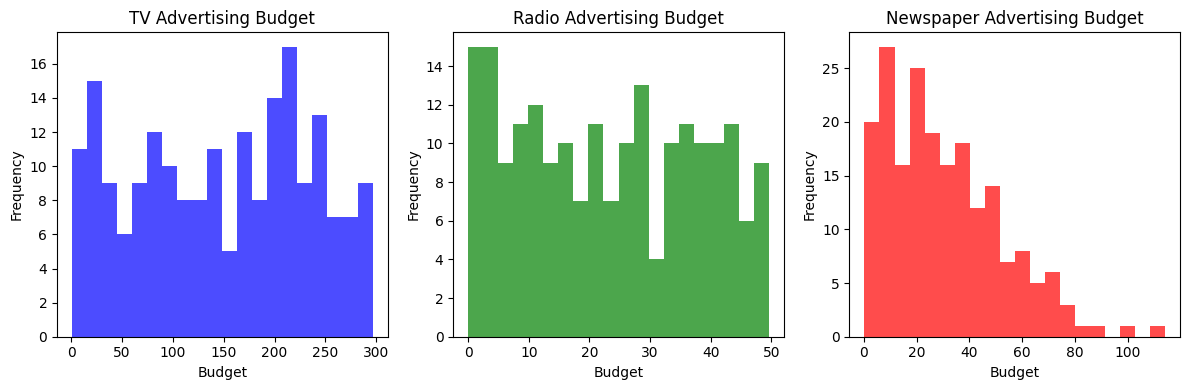

In [4]:
# Plot histograms for each advertising channel
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.hist(data['TV'], bins=20, color='blue', alpha=0.7)
plt.title('TV Advertising Budget')
plt.xlabel('Budget')
plt.ylabel('Frequency')

plt.subplot(1, 3, 2)
plt.hist(data['Radio'], bins=20, color='green', alpha=0.7)
plt.title('Radio Advertising Budget')
plt.xlabel('Budget')
plt.ylabel('Frequency')

plt.subplot(1, 3, 3)
plt.hist(data['Newspaper'], bins=20, color='red', alpha=0.7)
plt.title('Newspaper Advertising Budget')
plt.xlabel('Budget')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Correlation between Advertising Budgets and Sales

Correlation Matrix:
                 TV     Radio  Newspaper     Sales
TV         1.000000  0.054809   0.056648  0.901208
Radio      0.054809  1.000000   0.354104  0.349631
Newspaper  0.056648  0.354104   1.000000  0.157960
Sales      0.901208  0.349631   0.157960  1.000000


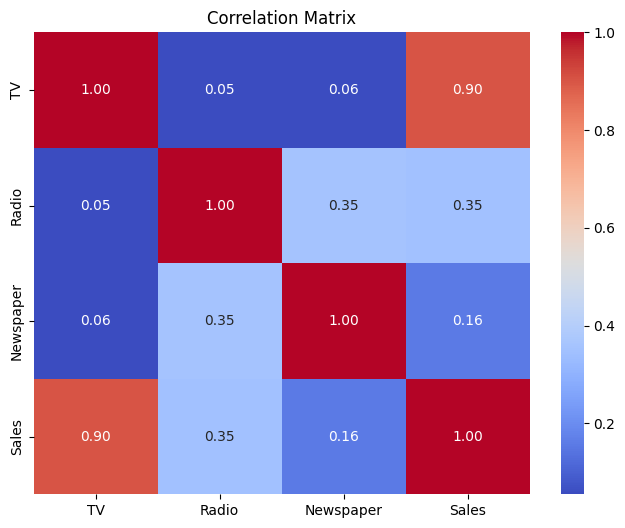

In [5]:
# Calculate correlation coefficients
correlation = data[['TV', 'Radio', 'Newspaper', 'Sales']].corr()

# Display correlation matrix
print("Correlation Matrix:")
print(correlation)

# Visualize correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# Pairwise Relationships

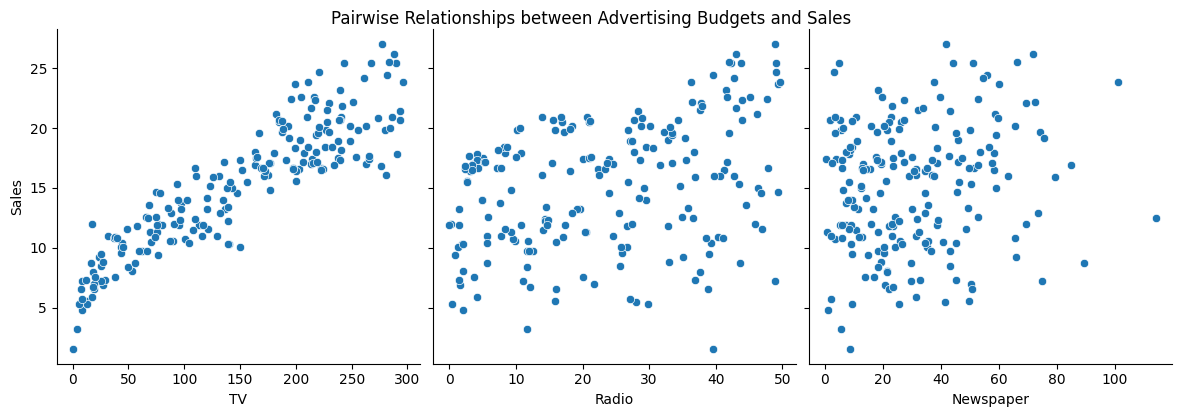

In [6]:
# Pairwise scatter plots
sns.pairplot(data, x_vars=['TV', 'Radio', 'Newspaper'], y_vars='Sales', height=4, aspect=1, kind='scatter')
plt.suptitle('Pairwise Relationships between Advertising Budgets and Sales', y=1.02)
plt.show()

# Feature Scaling

In [7]:
# Initialize the StandardScaler
scaler = StandardScaler()

# Scale the features (TV, Radio, Newspaper)
scaled_features = scaler.fit_transform(data[['TV', 'Radio', 'Newspaper']])

# Create a new DataFrame with the scaled features
scaled_data = pd.DataFrame(scaled_features, columns=['TV', 'Radio', 'Newspaper'])

# Concatenate the scaled features with the Sales column
scaled_data['Sales'] = data['Sales']

# Display the first few rows of the scaled dataset
print(scaled_data.head())

         TV     Radio  Newspaper  Sales
0  0.969852  0.981522   1.778945   22.1
1 -1.197376  1.082808   0.669579   10.4
2 -1.516155  1.528463   1.783549   12.0
3  0.052050  1.217855   1.286405   16.5
4  0.394182 -0.841614   1.281802   17.9


# Splitting Data

In [8]:
# Split the data into features (X) and target variable (y)
X = scaled_data[['TV', 'Radio', 'Newspaper']]
y = scaled_data['Sales']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the training and testing sets
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

Training set shape: (160, 3) (160,)
Testing set shape: (40, 3) (40,)


# Model Training

# Linear Regression model

In [9]:
# Initialize the Linear Regression model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Print the coefficients and intercept
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

# Make predictions on the testing data
y_pred = model.predict(X_test)

Coefficients: [4.66813753 1.49496505 0.09420978]
Intercept: 15.210200677006172


Coefficients:
* TV: 4.66813753
* Radio: 1.49496505
* Newspaper: 0.09420978
* Intercept: 15.210200677006172

These coefficients represent the effect of each feature on the sales figures. For example, for every unit increase in TV advertising budget, we expect sales to increase by approximately 4.67 units, holding other variables constant.

# Random Forest Regressor model

In [10]:
# Initialize the Random Forest Regressor model
rf_model = RandomForestRegressor(random_state=42)

# Train the model on the training data
rf_model.fit(X_train, y_train)

# Make predictions on the testing data
rf_y_pred = rf_model.predict(X_test)

# Calculate the RMSE

In [11]:
# Calculate the RMSE
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("Linear Regression RMSE:", rmse)

# Calculate the RMSE
rf_rmse = mean_squared_error(y_test, rf_y_pred, squared=False)
print("Random Forest RMSE:", rf_rmse)

Linear Regression RMSE: 1.7052146229349234
Random Forest RMSE: 1.198395062156049


# Residual Plot

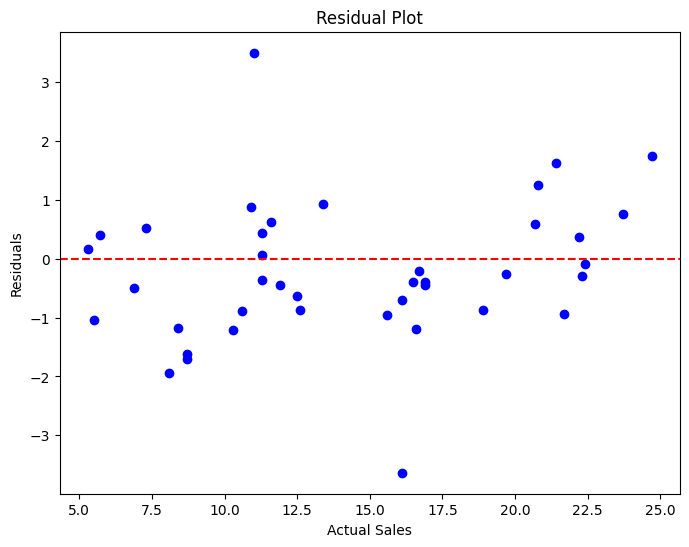

In [12]:
# Calculate residuals
residuals = y_test - rf_y_pred

# Plot residuals
plt.figure(figsize=(8, 6))
plt.scatter(y_test, residuals, color='blue')
plt.title('Residual Plot')
plt.xlabel('Actual Sales')
plt.ylabel('Residuals')
plt.axhline(y=0, color='red', linestyle='--')
plt.show()
